# Score crediticio

### Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Análisis Exploratorio de Datos (EDA) y Selección de Datos

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

C:\Users\Credicer\AppData\Local\Temp\ipykernel_20396\39135085.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


## Mostramos los títulos de las columnas


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Tamaño de la matriz


In [4]:
df.shape

(100000, 28)

## Tipos de datos


In [5]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### Eliminamos las columnas irrelevantes en el modelo y creamos un nuevo DataFrame sin las columnas eliminadas 

In [6]:
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


### Identificamos cuantos valores nulos se encuentran por columna


In [7]:
drop_df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

### Eliminamos los datos nulos


In [8]:
drop_na = drop_df.dropna().copy()

### Mostramos las primeras 10 lineas


In [9]:
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670318506144,Good


### Verificamos datos incorrectos y valores únicos

In [10]:

for i in drop_na:
 print("\n",i,drop_na[i].unique())



 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

### Eliminamos los datos incorrectos

In [11]:
drop_na = drop_na[drop_na["Occupation"].str.contains("______") ==False]
drop_na = drop_na[drop_na["Payment_Behaviour"].str.contains("!@9#%8") ==False]

### Eliminamos los símbolos

In [12]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

C:\Users\Credicer\AppData\Local\Temp\ipykernel_20396\1476005445.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


### Eliminamos el texto de Credit_History_Age

In [13]:
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

### Asignamos un número para cada categoría

In [14]:
drop_na["Payment_Behaviour"] = drop_na["Payment_Behaviour"].astype(str).replace({
 "Low_spent_Small_value_payments": "1",
 "Low_spent_Medium_value_payments": "2",
 "Low_spent_Large_value_payments": "3",
 "High_spent_Small_value_payments": "4",
 "High_spent_Medium_value_payments": "5",
 "High_spent_Large_value_payments": "6"
})
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good


In [15]:
drop_na.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

### Convertimos las columnas en tipo float

In [16]:
drop_na.dtypes

Age                       object
Occupation                object
Annual_Income             object
Delay_from_due_date       object
Num_of_Delayed_Payment    object
Outstanding_Debt          object
Credit_History_Age        object
Payment_of_Min_Amount     object
Total_EMI_per_month       object
Payment_Behaviour         object
Monthly_Balance           object
Credit_Score              object
dtype: object

In [17]:
col_int2 = ['Age', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
    'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance']
for i in  col_int2:
    drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

### Remplazamos los valores de la columna Credit_Score 

In [18]:
credit_score_dict = {"Good": 3, "Standard": 2, "Poor": 1}
drop_na["Credit_Score"] = drop_na["Credit_Score"].replace(credit_score_dict)

### Remplazamos los valores para la columna Payment_of_Min_Amount 

In [19]:
payment_dict ={"NM": 0, "Yes": 1, "No": 2}
drop_na["Payment_of_Min_Amount"] = drop_na["Payment_of_Min_Amount"].replace(payment_dict)

### Convertimos las columnas en valores float 

In [20]:
col_num = ["Credit_Score" , "Payment_of_Min_Amount"]
drop_na[col_num] = drop_na[col_num].astype(float)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2.0,49.574949,4.0,312.494089,3.0
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2.0,49.574949,2.0,331.209863,3.0
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2.0,49.574949,1.0,223.451310,3.0
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2.0,49.574949,1.0,244.565317,3.0
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2.0,18.816215,6.0,484.591214,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1.0,60.964772,6.0,337.362988,2.0
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2.0,35.104023,5.0,410.256158,1.0
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2.0,35.104023,6.0,479.866228,1.0
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2.0,35.104023,5.0,496.651610,1.0


In [21]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount     float64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score              float64
dtype: object

### Eliminamos filas duplicadas

In [22]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

Age                       71843
Occupation                71843
Annual_Income             71843
Delay_from_due_date       71843
Num_of_Delayed_Payment    71843
Outstanding_Debt          71843
Credit_History_Age        71843
Payment_of_Min_Amount     71843
Total_EMI_per_month       71843
Payment_Behaviour         71843
Monthly_Balance           71843
Credit_Score              71843
dtype: int64

In [23]:
df_cleaned = drop_na
df_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,71843.000000,7.184300e+04,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,7.184300e+04,71843.000000
mean,110.772212,1.751183e+05,21.041201,31.190443,1422.212792,18.389782,1.238047,1400.981096,3.272720,-3.247823e+22,1.887449
std,685.332013,1.430392e+06,14.867880,228.220729,1151.139555,8.289498,0.648968,8279.352134,1.845655,3.290163e+24,0.675195
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.930790e+04,10.000000,9.000000,565.995000,12.100000,1.000000,30.116962,1.000000,2.698337e+02,1.000000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.400000,18.200000,1.000000,68.348799,3.000000,3.364063e+02,2.000000
75%,42.000000,7.230590e+04,28.000000,18.000000,1941.540000,25.100000,2.000000,156.468001,5.000000,4.708997e+02,2.000000
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


### Calculamos el rango intercuartílico para eliminar los Outlier
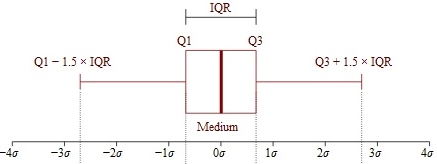

In [24]:
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3-Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned["Annual_Income"] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned["Annual_Income"] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2.0,49.574949,4.0,312.494089,3.0
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2.0,49.574949,2.0,331.209863,3.0
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2.0,49.574949,1.0,223.451310,3.0
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2.0,49.574949,1.0,244.565317,3.0
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2.0,18.816215,6.0,484.591214,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1.0,60.964772,6.0,337.362988,2.0
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2.0,35.104023,5.0,410.256158,1.0
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2.0,35.104023,6.0,479.866228,1.0
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2.0,35.104023,5.0,496.651610,1.0


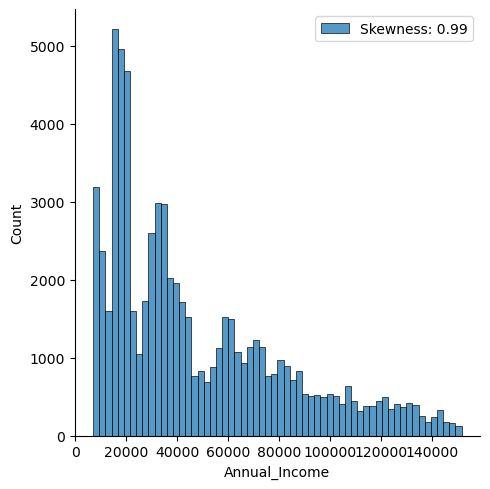

In [25]:
sns.displot(df_cleaned["Annual_Income"],label = 'Skewness: %.2f'%(df_cleaned['Annual_Income'].skew()))
plt.legend(loc= "best")

### Filtrar las filas con edades entre 18 y 99 años

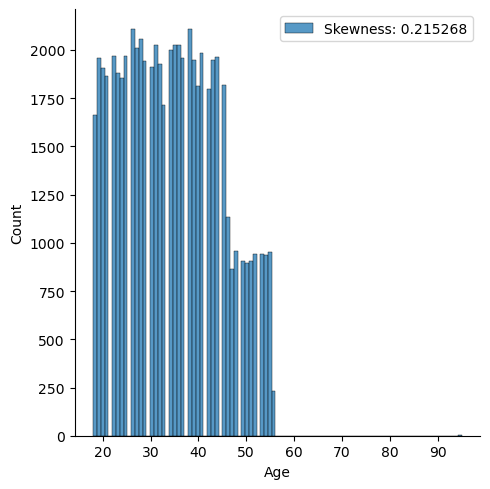

In [26]:
df_cleaned_filtered = df_cleaned.query('Age >= 18 and Age <= 99')  

sns.displot(df_cleaned_filtered["Age"], label='Skewness: %.6f' % (df_cleaned_filtered['Age'].skew()))
plt.legend(loc="best")
plt.show()

### Mostramos un diagrama de caja para visualizar la distribución de los datos, mostrando la mediana, el rango intercuartil (IQR), mostrando cómo se distribuyen los valores de ingresos anuales en la población estudiada.

Text(0.5, 1.0, 'Annual Income')

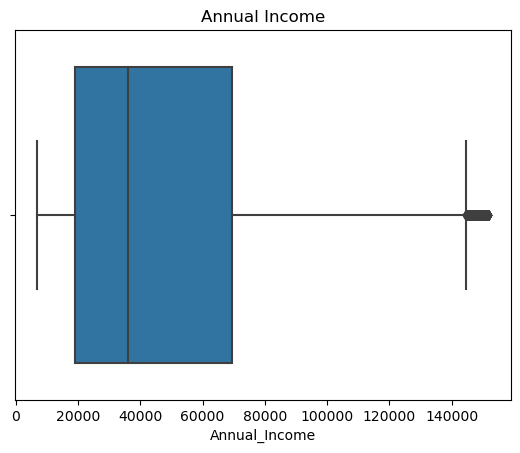

In [27]:
sns.boxplot(x=df_cleaned["Annual_Income"])
plt.title("Annual Income")

### Mostramos un diagrama de caja para visualizar la distribución de los datos, mostrando la mediana, el rango intercuartil (IQR), mostrando cómo se distribuyen los valores de deuda de las personas.

Text(0.5, 1.0, 'Outstanding Debt')

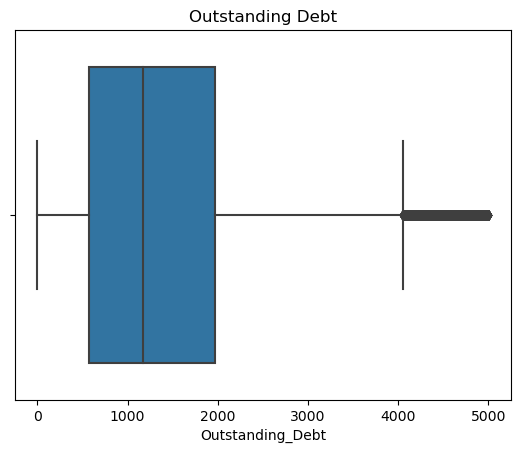

In [28]:
sns.boxplot(x=df_cleaned["Outstanding_Debt"])
plt.title("Outstanding Debt")

In [40]:
occupation_count = df_cleaned["Occupation"].value_counts(dropna = False)
occupation_count

Lawyer           4912
Mechanic         4761
Teacher          4760
Engineer         4752
Architect        4735
Scientist        4722
Entrepreneur     4680
Developer        4659
Media_Manager    4651
Accountant       4647
Journalist       4614
Doctor           4580
Manager          4480
Musician         4473
Writer           4414
Name: Occupation, dtype: int64